# Exercise 2: Unsupervised Learning
### Vincent G.

In [111]:
# # Retrieve dataset
# !curl -O archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

# # Tested on Ubuntu WSL
# !lsb_release -a

# # Install needed packages from PyPI
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install keras
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install matplotlib

# For Markdown formatting during display
from IPython.display import Markdown


## 🟢 (2.0 : Recreate the dataframe, training set and validation set, as in the Exercice 1)

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

features = [c for c in columns if c != 'mpg'] # columns but without target
target = ['mpg']

df = pd.read_csv(
    filepath_or_buffer='auto-mpg.data',
    delim_whitespace=True,
    names=columns
)
df.replace('?', np.nan, inplace=True)
df.dropna(how='any', inplace=True)

df.drop('car_name', axis=1, inplace=True)
features.remove('car_name') # also remove it from this list as it will be used later when defining X

X = df[features]
y = df[target]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=0)

# normalize
transformer = Normalizer().fit(X) # fit doesn't affect the data
train_X = pd.DataFrame(transformer.transform(train_X), columns=features)
val_X = pd.DataFrame(transformer.transform(val_X), columns=features)

## 2.1 : Apply the K-Means, DBScan and Hierarchical Agglomerative on the same training and test sets as before.

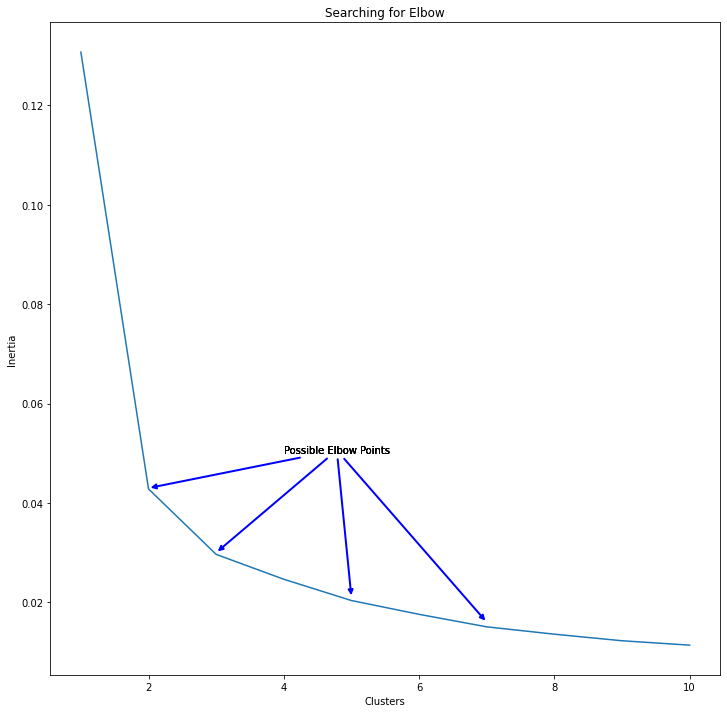

### We can find how many clusters we need using the "Elbow method".  By looking at the graph, we can identify two possible options : 2, 3, 5 or 7 clusters.

In [113]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(train_X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 12))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

annotation_targets = [
    (2, 0.043),
    (3, 0.03),
    (5, 0.021),
    (7, 0.016),
]

for target_coord in annotation_targets:
    ax.annotate('Possible Elbow Points', xy=target_coord, xytext=(4, 1*0.05), xycoords='data',          
                arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='blue', lw=2))

plt.show()
display(
    Markdown(
        """### We can find how many clusters we need using the "Elbow method".  """
        """By looking at the graph, we can identify two possible options : 2, 3, 5 or 7 clusters."""
    )
)

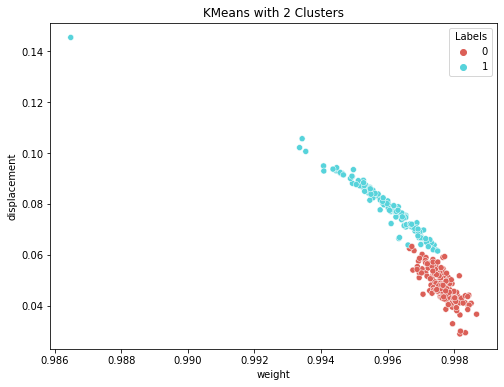

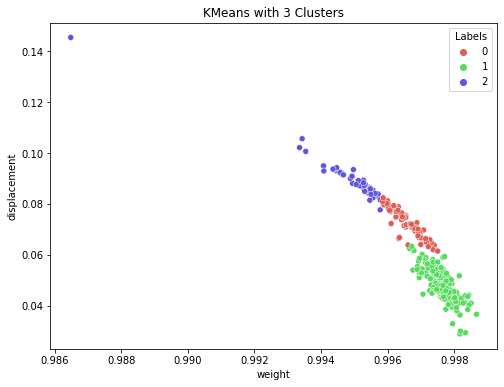

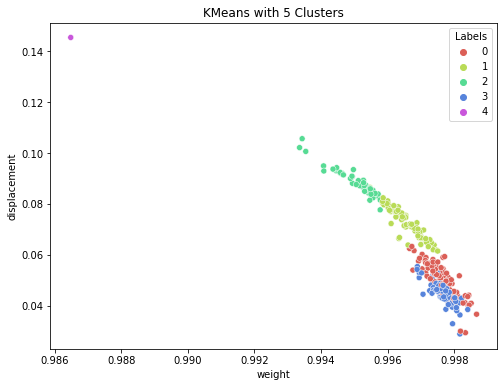

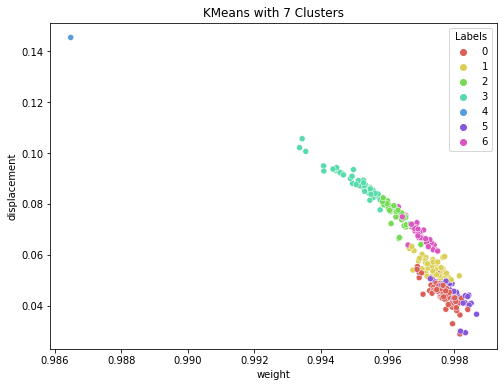

In [114]:
for cluster_count in [2, 3, 5, 7]:
    km = KMeans(n_clusters=cluster_count).fit(train_X)

    train_X['Labels'] = km.labels_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(train_X['weight'], train_X['displacement'], hue=train_X['Labels'], 
                    palette=sns.color_palette('hls', cluster_count))
    plt.title(f'KMeans with {cluster_count} Clusters')
    plt.show()

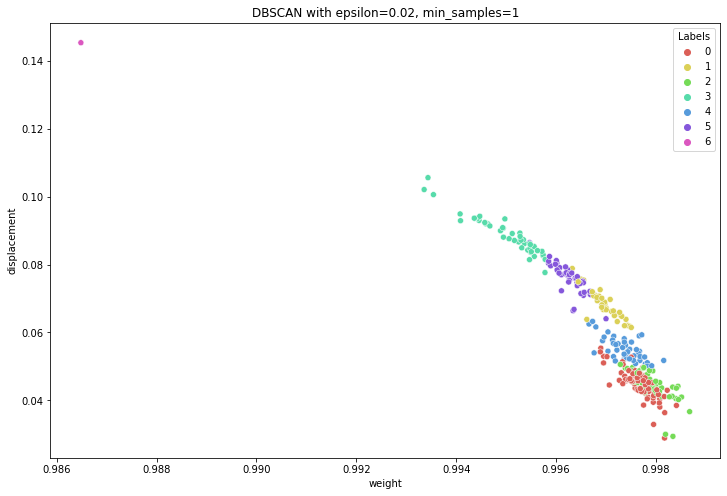

In [115]:
from sklearn.cluster import DBSCAN 

epsilon = 0.02
min_samples = 1

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(train_X)

train_X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(train_X['weight'], train_X['displacement'], hue=train_X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title(f'DBSCAN with epsilon={epsilon}, min_samples={min_samples}')
plt.show()

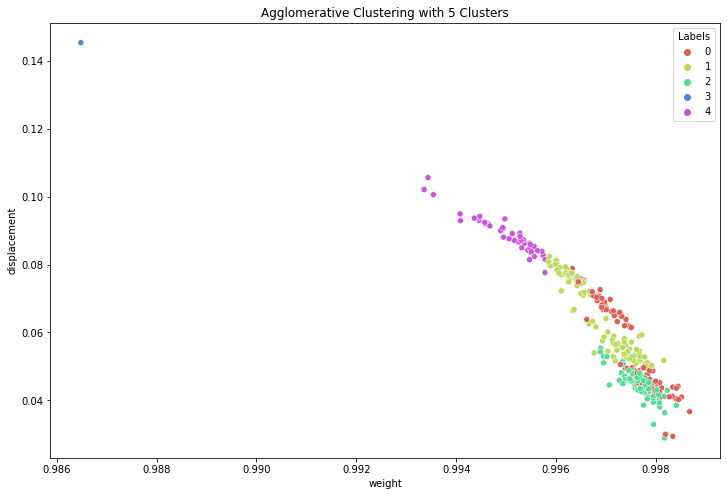

<bound method AgglomerativeClustering.fit_predict of AgglomerativeClustering(linkage='average', n_clusters=5)>

In [116]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(train_X)

train_X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(train_X['weight'], train_X['displacement'], hue=train_X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative Clustering with 5 Clusters')
plt.show()

agglom.fit_predict

## 🟢 2.2 + 2.3 : Compare the unsupervised learning results with the supervised learning results 
## + Could this dataset represent an unsupervised learning ?

As is, unsupervised learning doesn't seem do be the most efficient method for our use case.

As we could see in the pairplot / scatter-matrix (Exercice 1.4 - Visualization), identifying obvious clusters correlated with MPG amongst our `scatter plots` (`nuages de points`) is a difficult task.

On top of that, the MPG value is continuous and range from 9 to 46.6, meaning we would need a very large amount of clusters to obtain useable results with unsupervised learning (clusters that, as stated in the last sentence, we cannot seem to manage to find ...).